# Update the determination of PLQY with futher diluting

## 0. Set up cuvette, Uv lamp, LED light with optical fibers

#### Cuvette: 0.5 cm (5 mm) pathlength

#### Uv lamp: DH-2000-BAL

#### LED: THORLABS M365LP1

#### Spectrometer: QEPro

#### Optical Fibers: QP600-2-SR (input LED, output spectra), QP200-2-SR-BX (input UV)

(-0.5, 2169.5, 2583.5, -0.5)

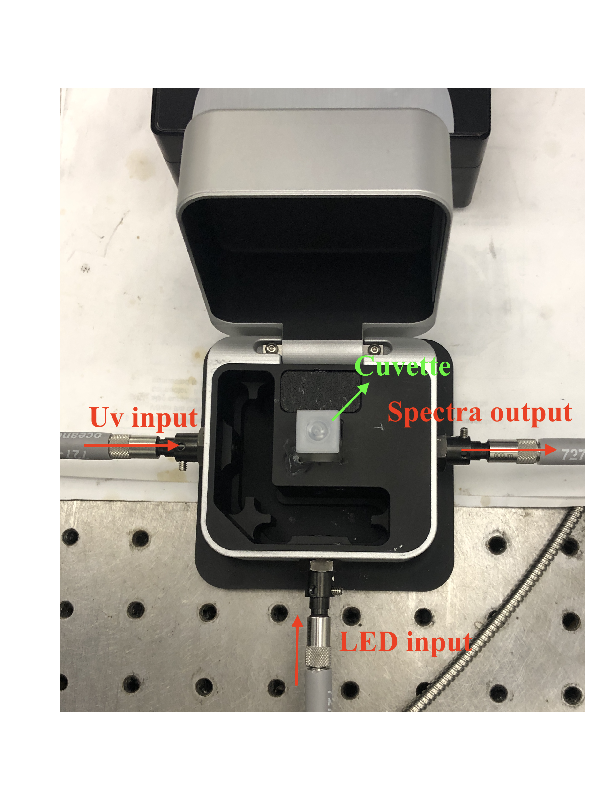

In [1]:
import os
from skimage import io
import matplotlib.pyplot as plt
%matplotlib widget

plt.close('all')

cwd = os.getcwd()
png = cwd + '/Cuvette_IMG_5071.png'

img = io.imread(png)
plt.figure(figsize=(6,8))
io.imshow(img)
plt.axis('off')

## 1. Dilute CsPbBr$_{3}$ in cuvettes

### 1-1. Prepare precursors
Precursor 1: CsPb(oleate)$_{3}$, 6 mM in Toluene:Oleic acid = 5:1

Precursor 2: Tetraoctylammonium Bromide (TOABr), 12 mM in Toluene:Oleic acid = 5:1

Dilute solvent: Toluene:Oleic acid = 5:1

### 1-2. Dilute Conditions

#### For CsPbBr$_{3}$:

Initial concnetration: 4 mM (said the reaction takes the stoichiometry CsPb:Br = 1:3)

dilute fraction: 1, 2, 4, 8, 16

In [2]:
import numpy as np
dilute_constant = np.asarray([1,2,4,8,16])
dilute_concentration = 4 / dilute_constant
print(f'Concentraiton of CsPbBr3 after dilute: {dilute_concentration}.')

Concentraiton of CsPbBr3 after dilute: [4.   2.   1.   0.5  0.25].


### 1-3. Measure absorption spectra and photoluminescence spectra 

Reference for absorption: Toluene:Oleic acid = 5:1

Integration time: 10 ms

Number of spectra to average: 9

In [3]:
import pandas as pd
import numpy as np

fn_PL = cwd + '/20230829_CsPbBr_PL.txt'
fn_abs = cwd + '/20230829_CsPbBr_abs.txt'
data_PL = pd.read_csv(fn_PL, sep = ' ' )
data_abs = pd.read_csv(fn_abs, sep = ' ' )
rows = 1
cols = 2
keys_list_PL = list(data_PL.keys())
keys_list_abs = list(data_PL.keys())

In [4]:
import palettable.colorbrewer.diverging as pld
palette = pld.RdYlGn_4_r
cmap = palette.mpl_colormap

(160.0, 700.0)

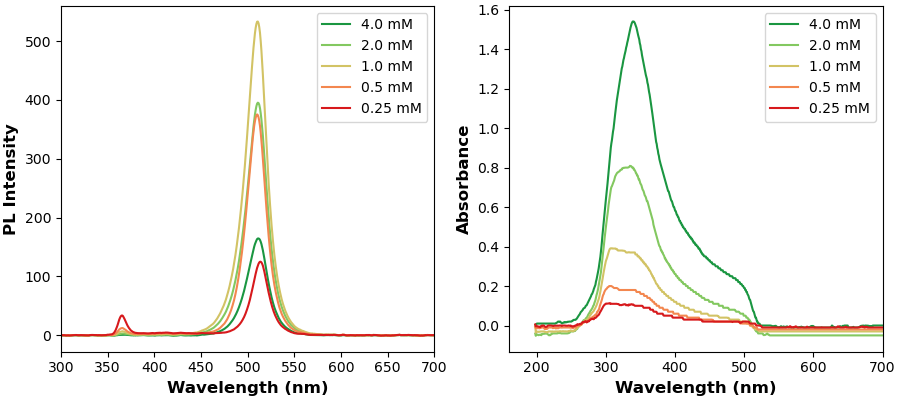

In [5]:
f1, ax1 = plt.subplots(rows, cols, figsize = (9, 4), constrained_layout=True)
color_idx = np.linspace(0, 1, len(dilute_concentration))
prop = {'weight':'bold', 'size':12}
for i in range(len(dilute_concentration)):
    ax1[0].plot(data_PL[keys_list_PL[i*2]], data_PL[keys_list_PL[i*2+1]], color=cmap(color_idx[i]), label = f'{dilute_concentration[i]} mM')
    ax1[1].plot(data_abs[keys_list_abs[i*2]], data_abs[keys_list_abs[i*2+1]], color=cmap(color_idx[i]), label = f'{dilute_concentration[i]} mM')


ax1[0].legend()
ax1[1].legend()
ax1[0].set_xlabel('Wavelength (nm)', fontdict=prop)
ax1[1].set_xlabel('Wavelength (nm)', fontdict=prop)
ax1[0].set_ylabel('PL Intensity', fontdict=prop)
ax1[1].set_ylabel('Absorbance', fontdict=prop)
ax1[0].set_xlim(300, 700)
ax1[1].set_xlim(160, 700)

## 2. Measure Uv-Vis of Quinine

### 2-1. Prepare Quinine in H$_{2}$SO$_{4}$

#### Supplier (Quinine sulfate):

https://www.fishersci.com/shop/products/quinine-sulfate-dihydrate-specified-according-the-requirements-usp-thermo-scientific/AC418780050

#### Dissovle quinie in H$_{2}$SO$_{4}$, concentrations:

Quinine: 0.1 mM

H$_{2}$SO$_{4}$: 50 mM

### 2-2. Measure Uv-Vis of Quinine

Reference for absorption: H$_{2}$SO$_{4}$ 50 mM

Integration time: 10 ms

Number of spectra to average: 9

#### **Integration time and Number of spectra to average are consistent with CsPbBr/I$_{3}$**
#### **Integration time and Number of spectra to average are fixed during every measurment**

In [6]:
fn2 = cwd + '/20230829_quinine_1E-4M_Abs-BX.txt'
data2 = pd.read_csv(fn2, sep = ' ' )
rows = 1
cols = 2
keys_x = np.asarray(data2.keys()[::2]).reshape(rows, cols)
keys_y = np.asarray(data2.keys()[1::2]).reshape(rows, cols)
keys_y

array([['quinine_0.1mM_PL', 'quinine_0.1mM_Abs']], dtype=object)

(160.0, 700.0)

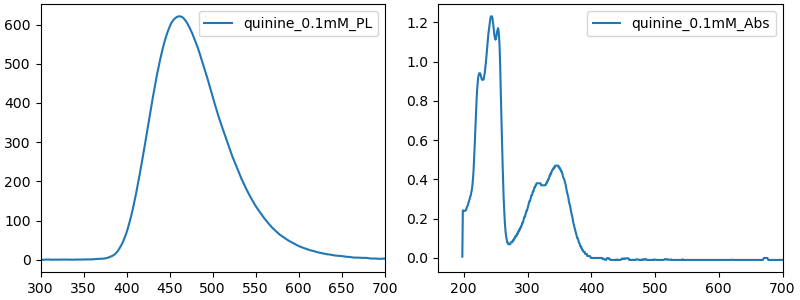

In [7]:
f2, ax2 = plt.subplots(rows, cols, figsize = (8, 3), constrained_layout=True)
for i in range(rows):
    for j in range(cols):
        ax2[j].plot(data2[keys_x[i][j]], data2[keys_y[i][j]], label = keys_y[i][j])
        ax2[j].legend()
ax2[0].set_xlim(300, 700)
ax2[1].set_xlim(160, 700)

## 3. Calculate PLQY by using quinine as standard

### 3-1. PLQY formula

#### Reference:  
https://www.rsc.org/suppdata/d0/re/d0re00129e/d0re00129e1.pdf  
**S.5 – Quantum Yield Calculations**


(-0.5, 1322.5, 601.5, -0.5)

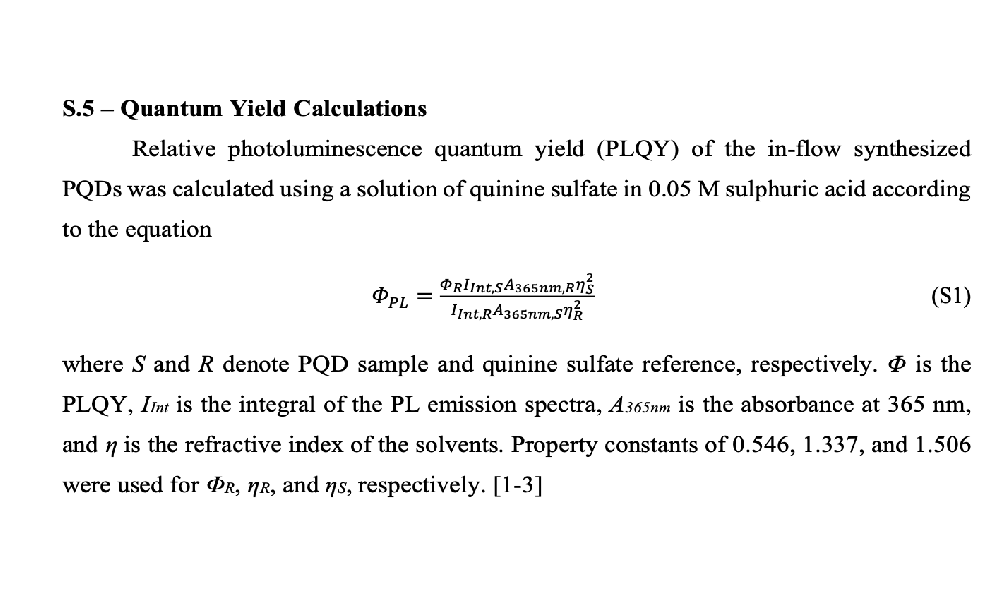

In [8]:
png2 = cwd + '/S5_quinine_plqy.png'
img2 = io.imread(png2)
plt.figure(figsize=(10,6))
io.imshow(img2)
plt.axis('off')

### 3-2. Get necessary numbers

In [9]:
from scipy import integrate

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

def plqy_quinine(absorbance_sample, PL_integral_sample, refractive_index_solvent, 
                     absorbance_reference, PL_integral_reference, refractive_index_reference, plqy_reference):
    
    integral_ratio = PL_integral_sample / PL_integral_reference
    absorbance_ratio = absorbance_reference / absorbance_sample
    refractive_index_ratio = (refractive_index_solvent / refractive_index_reference)**2

    plqy = plqy_reference * integral_ratio * absorbance_ratio * refractive_index_ratio
    return plqy

wavelength_range = [390, 800]

#### 3-2-1. Find $I_{int,R}$ and $A_{365nm,R}$ of Quinine

In [10]:
idx_w0, w0 = find_nearest(data2['Wavelength_01'], wavelength_range[0])
idx_w1, w1 = find_nearest(data2['Wavelength_01'], wavelength_range[1])
x = data2['Wavelength_01'][idx_w0:idx_w1]
y = data2['quinine_0.1mM_PL'][idx_w0:idx_w1]
IintR = integrate.simpson(y, x)
print(f'Integral of quinine PL: {IintR:.3f}')

Integral of quinine PL: 63356.826


In [11]:
idx_a365, _ = find_nearest(data2['Wavelength_01'], 365)
A365R = data2['quinine_0.1mM_Abs'][idx_a365]
print(f'Absorbance of quinine at 365 nm: {A365R:.3f}')

Absorbance of quinine at 365 nm: 0.290


#### 3-2-2. Calculate PLQY for CsPbBr$_{3}$ and CsPbI$_{3}$

### Import analysis functions to get PE, FWHM, PLQY

In [12]:
%run -i /Users/chenghunglin/Documents/Git_BNL/profile_collection_ldrd20-31/scripts/_data_analysis.py

In [13]:
idx_w0, w0 = find_nearest(data_PL['x_CsPbBr_dilute_00'], wavelength_range[0])
idx_w1, w1 = find_nearest(data_PL['x_CsPbBr_dilute_00'], wavelength_range[1])

x0 = data_PL['x_CsPbBr_dilute_00'][idx_w0:idx_w1].to_numpy()

peak_list = []
fwhm = []
simpson_int = []

for i in range(len(dilute_concentration)):
    y0 = data_PL[keys_list_PL[i*2+1]][idx_w0:idx_w1].to_numpy()
    peak, prop = good_bad_data(x0, y0, key_height=100, data_id = f'{dilute_concentration[i]} mM', distance=20, height=50)
    x, y, p, f, popt = _fitting_in_kafka(x0, y0, f'{dilute_concentration[i]} mM', peak, prop)  
    simpson_int.append(integrate.simpson(y,x))
    peak_list.append(popt[1])
    fwhm.append(2.355*popt[2])

4.0 mM passes c1 so is good.

** Average of 4.0 mM has peaks at [156]**


** start to do peak fitting by Gaussian**

2.0 mM passes c1 so is good.

** Average of 2.0 mM has peaks at [155]**


** start to do peak fitting by Gaussian**

1.0 mM passes c1 so is good.

** Average of 1.0 mM has peaks at [155]**


** start to do peak fitting by Gaussian**

0.5 mM passes c1 so is good.

** Average of 0.5 mM has peaks at [154]**


** start to do peak fitting by Gaussian**

0.25 mM passes c1 so is good.

** Average of 0.25 mM has peaks at [158]**


** start to do peak fitting by Gaussian**



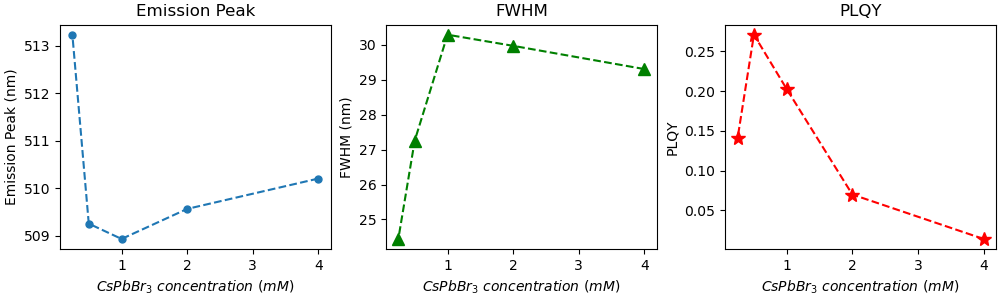

In [14]:
abs_365 = data_abs.iloc[idx_a365][1::2].to_numpy()

abs_365_r = 0.29
plqy_r = 0.546
ref_idx_toluene = 1.506
ref_idx_H2SO4 = 1.337
integral_r = 63344.8
integral_pqds = np.asarray(simpson_int)

plqy = plqy_quinine(abs_365, integral_pqds, 1.506, abs_365_r, integral_r, 1.337, 0.546)
    

x_list = dilute_concentration

rows = 1
cols = 3

f5, ax5 = plt.subplots(rows, cols, figsize = (10, 3), constrained_layout=True)
ax5[0].set_title('Emission Peak')
ax5[0].set_xlabel(r'$CsPbBr_3\ concentration\ (mM)$', fontdict={'size': 10})
ax5[0].set_ylabel('Emission Peak (nm)')
ax5[1].set_title('FWHM')
ax5[1].set_xlabel(r'$CsPbBr_3\ concentration\ (mM)$', fontdict={'size': 10})
ax5[1].set_ylabel('FWHM (nm)')
ax5[2].set_title('PLQY')
ax5[2].set_xlabel(r'$CsPbBr_3\ concentration\ (mM)$', fontdict={'size': 10})
ax5[2].set_ylabel('PLQY')


ax5[0].plot(x_list, peak_list, '.--', markersize=10)
ax5[1].plot(x_list, fwhm, 'g^--', markersize=8)
ax5[2].plot(x_list, plqy, 'r*--', markersize=10)

In [15]:
for i in range(len(dilute_concentration)):
    print(f'Absorbance at 365 nm for CsPbBr3 {dilute_concentration[i]} mM is {abs_365[i]}.')

Absorbance at 365 nm for CsPbBr3 4.0 mM is 1.13.
Absorbance at 365 nm for CsPbBr3 2.0 mM is 0.57.
Absorbance at 365 nm for CsPbBr3 1.0 mM is 0.27.
Absorbance at 365 nm for CsPbBr3 0.5 mM is 0.13.
Absorbance at 365 nm for CsPbBr3 0.25 mM is 0.08.
